In [1]:
# K-Nearest Neighbor Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# load the MNIST digits dataset
mnist = datasets.load_digits()

#print (mnist.data)

# Training and testing split,
# 75% for training and 25% for testing
(x_train, x_test, y_train, y_test) = train_test_split(
    np.array(mnist.data), mnist.target, test_size=0.25, random_state=42)


In [3]:
# Checking sizes of each data split
print(f"training data points: {x_train.shape[0]}")
print(f"testing data points: {x_test.shape[0]}")


training data points: 1347
testing data points: 450


In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_test)

(1347, 64)
(450, 64)
(450,)
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 3 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5]


[ 0.  5. 16. 15.  3.  0.  0.  0.  0. 11. 14. 11. 11.  0.  0.  0.  0.  8.
 11.  4. 16.  0.  0.  0.  0.  0.  0.  4. 13.  0.  0.  0.  0.  0.  0.  8.
 12.  0.  0.  0.  0.  0.  0. 13.  9.  5.  1.  0.  0.  1. 11. 16. 16. 16.
 10.  0.  0.  5. 16. 14.  8.  6.  1.  0.]
2


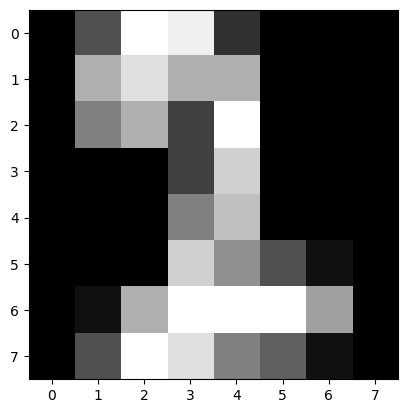

In [5]:
print(x_train[1])
print(y_train[1])

plt.imshow(x_train[1].reshape(8, 8), cmap='gray');

In [6]:
print(y_train.shape)
print(y_train.dtype)
y_train[0:8]
print(y_train.min(), y_train.max())

print(x_train.dtype)
print(x_train.min(), x_train.max())

print(len(set(x_train.flatten())))

(1347,)
int64
0 9
float64
0.0 16.0
17


In [7]:
# Convert to int32
x_train = x_train.astype('int32')
x_test = x_test.astype('int32')

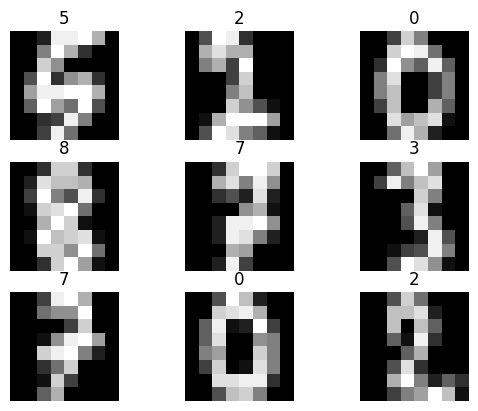

In [8]:
# visualize
plt.figure
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i].reshape(8, 8), cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
    plt.savefig('mnist_plot.png')
plt.show()

# Create a simple KNN algorithm for classifying the digits
# What does a KNN algorithm need to have for its data type?